In [1]:
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.style.use('ggplot')

### data encoding & merge

In [2]:
FC = pd.read_csv('D:/한이음/Data/FC.csv')

C:\Users\zzang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
FC.tail() # 추 후에 CORP_ID , DATE로 묶을거기 때문에 concat 사용해도 괜찮을 것이라 판단

,Unnamed: 0,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1786369,1786369,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786370,1786370,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786371,1786371,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786372,1786372,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786373,1786373,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,20.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


### 결측치 처리 생각

In [4]:
FC.isnull().sum() # 결측치 어떻게 처리할지 생각

# 품목수량으로 count or size로 예측할거니까 INV_AMT(주문금액) ITEM_AMT(품목금액)은 0으로 해도 무방할 것 같음
# 비슷한 생각으로 일단 중간 보고까지 중요한것은 품목수량이기 때문에 결측치를 제거하기보단 0이나 평균치로 채워넣어서 row 갯수를 지키는게 좋을 것 같음

Unnamed: 0                 0
CORP_ID                    0
REF_ORD_NO                 0
BKG_NO                     9
BKG_TYP                    0
BKG_DATE                   0
BKG_TIME                   0
SHPR_CD                    0
INV_AMT                28011
ITEM_SEQ                   0
ITEM_CD                    0
BRAND_NM               41959
ITEM_QTY                   0
ITEM_AMT               18730
IF_YN                      0
ORDER_CRT_DATETIME     41961
DLV_DV                  1043
REF_ITEM_SEQ            1000
ORDER_IDX                  0
ORDER_YN                   0
DLVPREARRBRANCD         1043
DLVPREARREMPNICKNM     60172
DLVCLSFCD               1043
DLVSUBCLSFCD            1150
INS_ID                     0
INS_DATE                   0
INS_TIME                   0
POST_ZONE               1043
SPLIT_EXEC_YN              0
SHPR_ADDR_1                0
SHPR_ADDR_2           109251
CNEE_ADDR_1               35
CNEE_ADDR_2            35977
dtype: int64

### 창고 전체 주문량 확인

In [5]:
FC['CORP_ID'].unique() # 창고코드 2개 (곤지암 / 군포)

array(['KX007', 'GP001'], dtype=object)

In [41]:
#창고별 주문량

from pandas import Series,DataFrame

FC_ID = FC['CORP_ID'].value_counts()
all_fc = DataFrame(FC_ID)
all_fc = all_fc.reset_index()
all_fc = all_fc.rename(columns={'index':'창고 번호','CORP_ID':'주문 횟수'})
all_fc

,창고 번호,주문 횟수
0,KX007,1606010
1,GP001,180364


In [42]:
# Datetime으로 변환

FC['BKG_DATE']= FC['BKG_DATE'].astype('str')
FC['BKG_DATE']=pd.to_datetime(FC['BKG_DATE'])
FC['BKG_DATE']

0         2021-03-03
1         2021-03-03
2         2021-03-03
3         2021-03-03
4         2021-03-03
             ...    
1786369   2021-06-28
1786370   2021-06-28
1786371   2021-06-28
1786372   2021-06-28
1786373   2021-06-28
Name: BKG_DATE, Length: 1786374, dtype: datetime64[ns]

### 창고 전체  DataFrame  =  df_FC_DT

In [43]:
# 날짜 별 주문량 확인
FC_DT = FC['BKG_DATE'].value_counts()
df_FC_DT = DataFrame(FC_DT)
df_FC_DT = df_FC_DT.reset_index()
df_FC_DT = df_FC_DT.rename(columns={'index':'BKG_DATE','BKG_DATE':'COUNT'})
df_FC_DT = df_FC_DT.sort_values(by=[df_FC_DT.columns[0]],ascending=True)
df_FC_DT

,BKG_DATE,COUNT
97,2021-03-01,8536
66,2021-03-02,11912
53,2021-03-03,13756
78,2021-03-04,10330
58,2021-03-05,12929
...,...,...
40,2021-06-26,16404
20,2021-06-27,20792
7,2021-06-28,28663
15,2021-06-29,22477


Text(0.5, 1.0, '전체 창고 주문량')

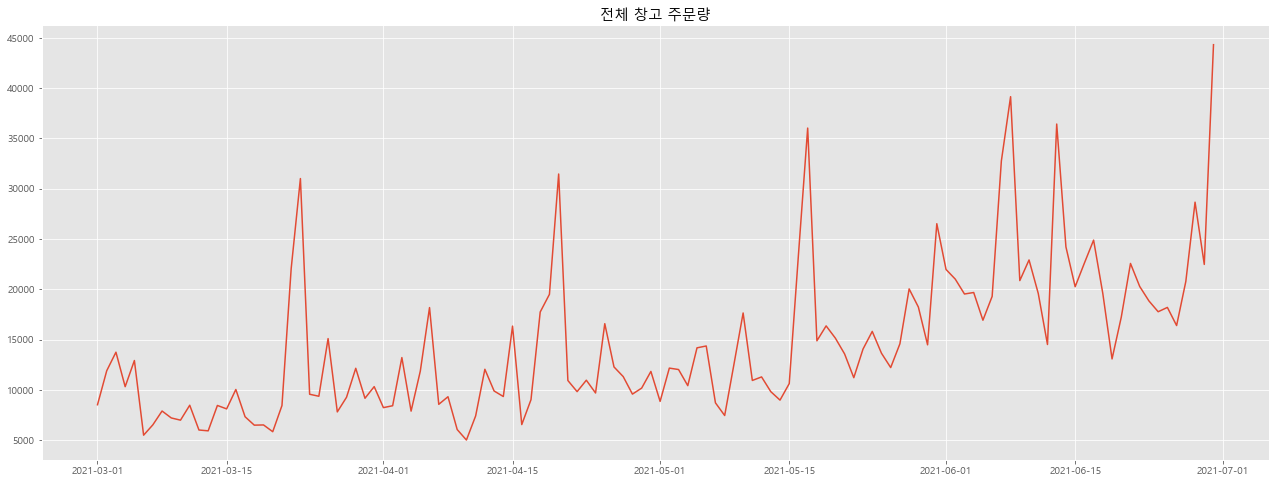

In [45]:
plt.figure(figsize=(22,8))
plt.plot(df_FC_DT['BKG_DATE'],df_FC_DT['COUNT'])
plt.title('전체 창고 주문량') # 곤지암 + 군포

### 곤지암 추출

In [46]:
# 전체 창고 데이터에서 '곤지암' 만 추출

FC_gon = FC.query('CORP_ID=="KX007"')
FC_gon= FC_gon[['REF_ORD_NO','CORP_ID','BKG_DATE','SHPR_CD']]
FC_gon

,REF_ORD_NO,CORP_ID,BKG_DATE,SHPR_CD
0,2021030365922551,KX007,2021-03-03,90001302
1,2021030365922951,KX007,2021-03-03,90001441
2,2021030365924361,KX007,2021-03-03,90001441
3,2021030365928921,KX007,2021-03-03,90001542
4,2021030365930451,KX007,2021-03-03,90001341
...,...,...,...,...
1786347,2021062954478421,KX007,2021-06-29,90001443
1786348,2021063067849541,KX007,2021-06-30,90001662
1786349,2021063078029521_1,KX007,2021-06-30,90001443
1786354,2021062966256441,KX007,2021-06-29,90001622


### 곤지암 DataFrame = FC_gon

In [47]:
# 곤지암 날짜별 주문량 DataFrame

FC_gon = FC_gon.groupby(['BKG_DATE']).count()
FC_gon = FC_gon.rename(columns={'REF_ORD_NO':'COUNT'})
FC_gon = FC_gon.drop(['SHPR_CD','CORP_ID'],axis=1)
FC_gon = FC_gon.reset_index()
FC_gon

,BKG_DATE,COUNT
0,2021-03-01,8536
1,2021-03-02,11912
2,2021-03-03,13756
3,2021-03-04,10330
4,2021-03-05,12929
...,...,...
117,2021-06-26,12741
118,2021-06-27,15589
119,2021-06-28,18636
120,2021-06-29,15412


Text(0.5, 1.0, '곤지암 주문량')

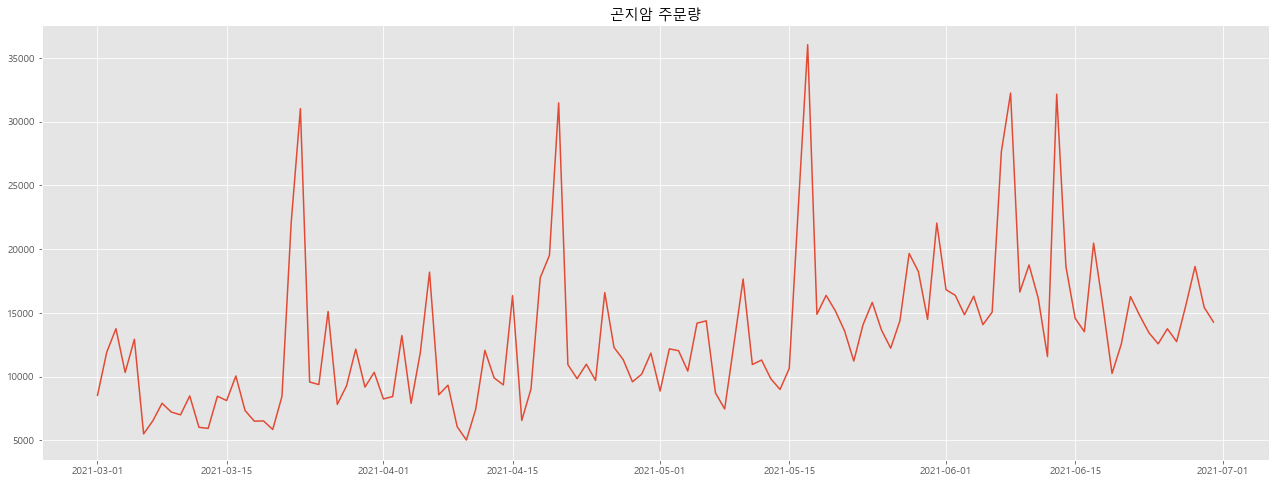

In [48]:
plt.figure(figsize=(22,8))
plt.plot(FC_gon['BKG_DATE'],FC_gon['COUNT'])
plt.title('곤지암 주문량') # 마지막 치솟는 spot을 제외하면 전체 그래프와 흡사함

### Time Series / df  = FC_gon ( 곤지암 DataFrame )

In [49]:
import copy
df = copy.deepcopy(FC_gon)

In [50]:
df.head()

,BKG_DATE,COUNT
0,2021-03-01,8536
1,2021-03-02,11912
2,2021-03-03,13756
3,2021-03-04,10330
4,2021-03-05,12929


<ipython-input-51-99328421b504>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['COUNT'],model = 'addtive',freq=7)


<Figure size 720x432 with 0 Axes>

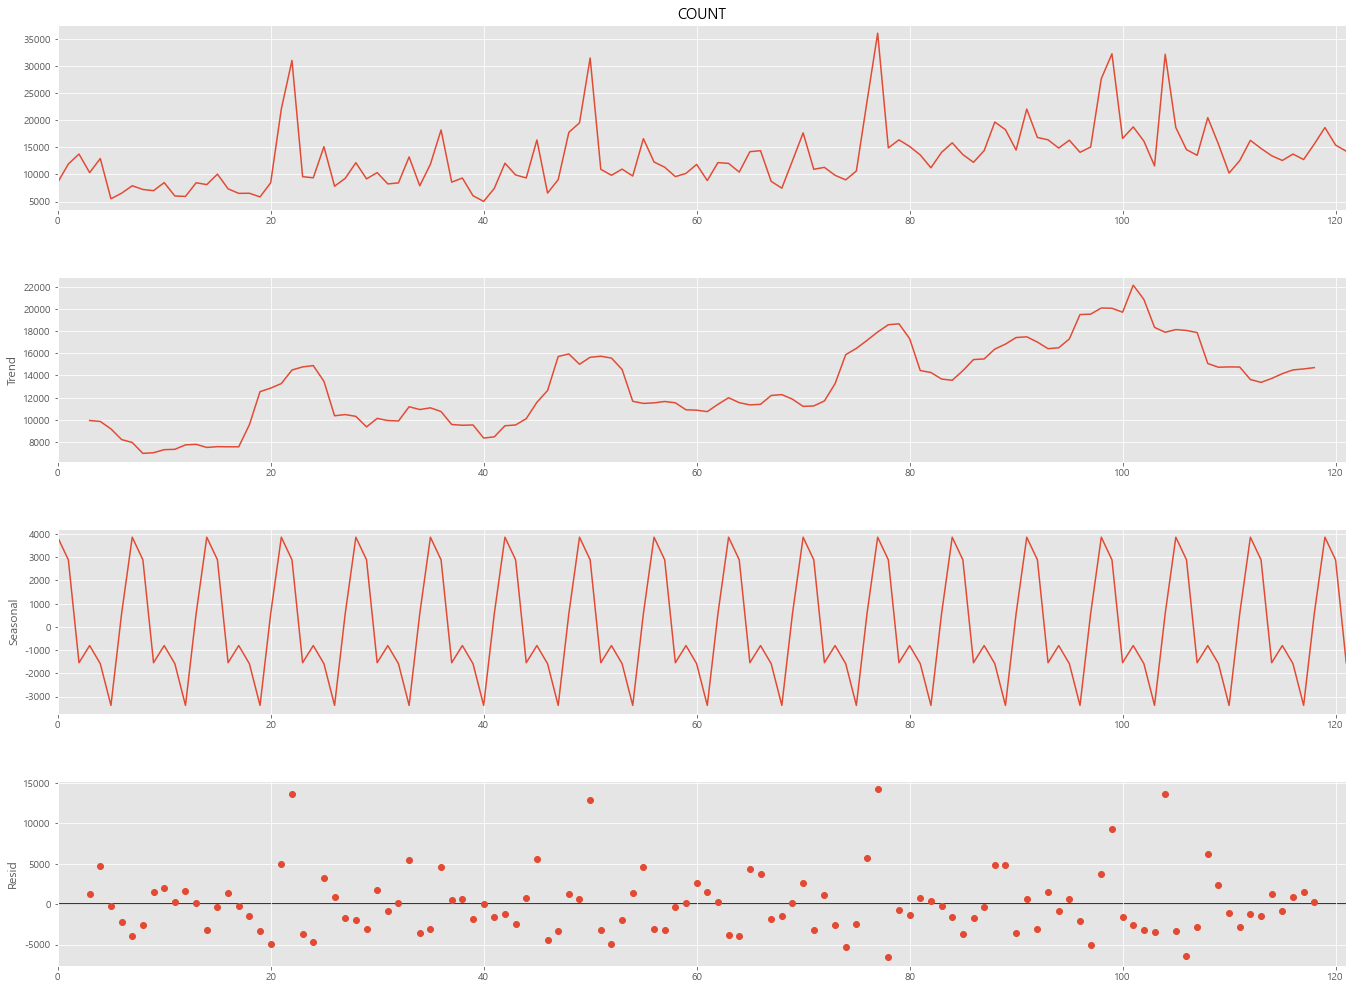

In [51]:
# addtive는 Trend와 Seasonal이 별개이고, multiplicative 분해는 Trend에 따라 Seasonal이 변화
# multiplicative는 0이 있으면 안되기 때문에, addtive로 분해하여 확인

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['COUNT'],model = 'addtive',freq=7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

### 곤지암 DataFrame  index 지정

In [52]:
df.index = df['BKG_DATE']
df.set_index('BKG_DATE', inplace=True)

In [53]:
df.head()

,COUNT
BKG_DATE,
2021-03-01,8536
2021-03-02,11912
2021-03-03,13756
2021-03-04,10330
2021-03-05,12929


https://aliencoder.tistory.com/9 <br>ACF / PACF

### ACF / PACF 확인 - 1

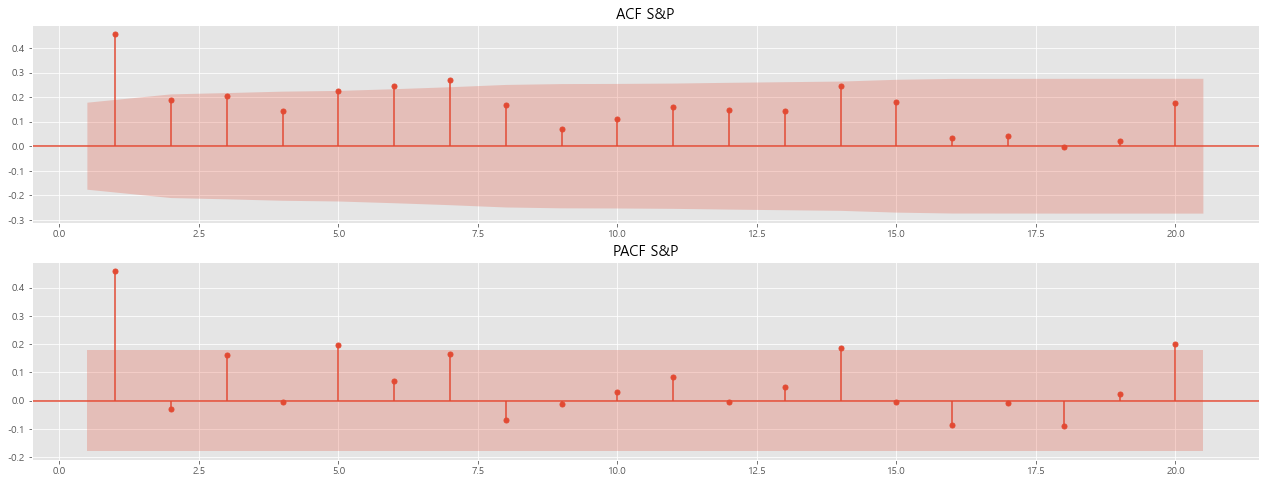

In [54]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm

## Close
fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df['COUNT'], lags = 20, zero = False, ax=ax1)
ax1.set_title("ACF S&P")


sgt.plot_pacf(df['COUNT'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF S&P")

plt.show()

### ACF 확인 - 2

In [55]:
sm.tsa.stattools.acf(df['COUNT'], nlags=20, fft=False)

array([ 1.        ,  0.45803194,  0.18792587,  0.20285354,  0.14438538,
        0.22670147,  0.24476829,  0.26995238,  0.1672289 ,  0.07152849,
        0.10924179,  0.15839833,  0.14593495,  0.14350042,  0.24755416,
        0.17936497,  0.03303512,  0.03993831, -0.00410954,  0.02294216,
        0.17688644])

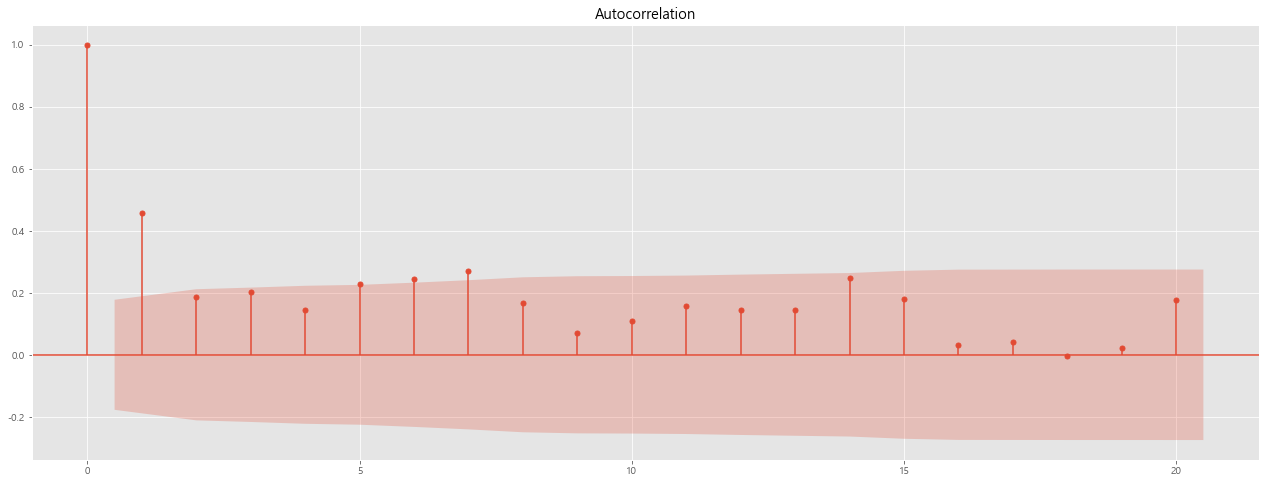

In [56]:
fig = plt.figure(figsize=(22,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(df['COUNT'], lags=20, ax=ax)
plt.show()

### PACF 확인 - 2

In [57]:
sm.tsa.stattools.pacf(df['COUNT'], nlags=20, method='ywm')

array([ 1.        ,  0.45803194, -0.027673  ,  0.16093005, -0.00816182,
        0.19740372,  0.06402539,  0.16137697, -0.07296306, -0.01619871,
        0.02346639,  0.07783985, -0.01537076,  0.03936547,  0.17041388,
       -0.01822337, -0.09653444, -0.02369821, -0.10552542,  0.00572432,
        0.15239554])

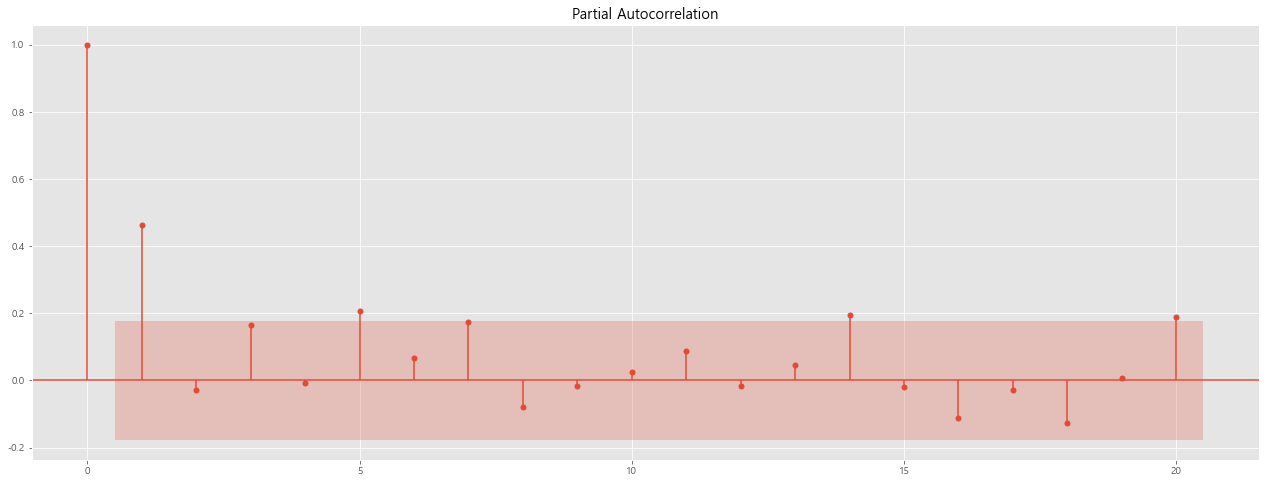

In [58]:
fig = plt.figure(figsize=(22,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_pacf(df['COUNT'], lags=20, ax=ax)
plt.show()

------

### 시계열 분해

<ipython-input-59-d35dfd5c0f5e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['COUNT'],model = 'addtive',freq=7)


<Figure size 720x432 with 0 Axes>

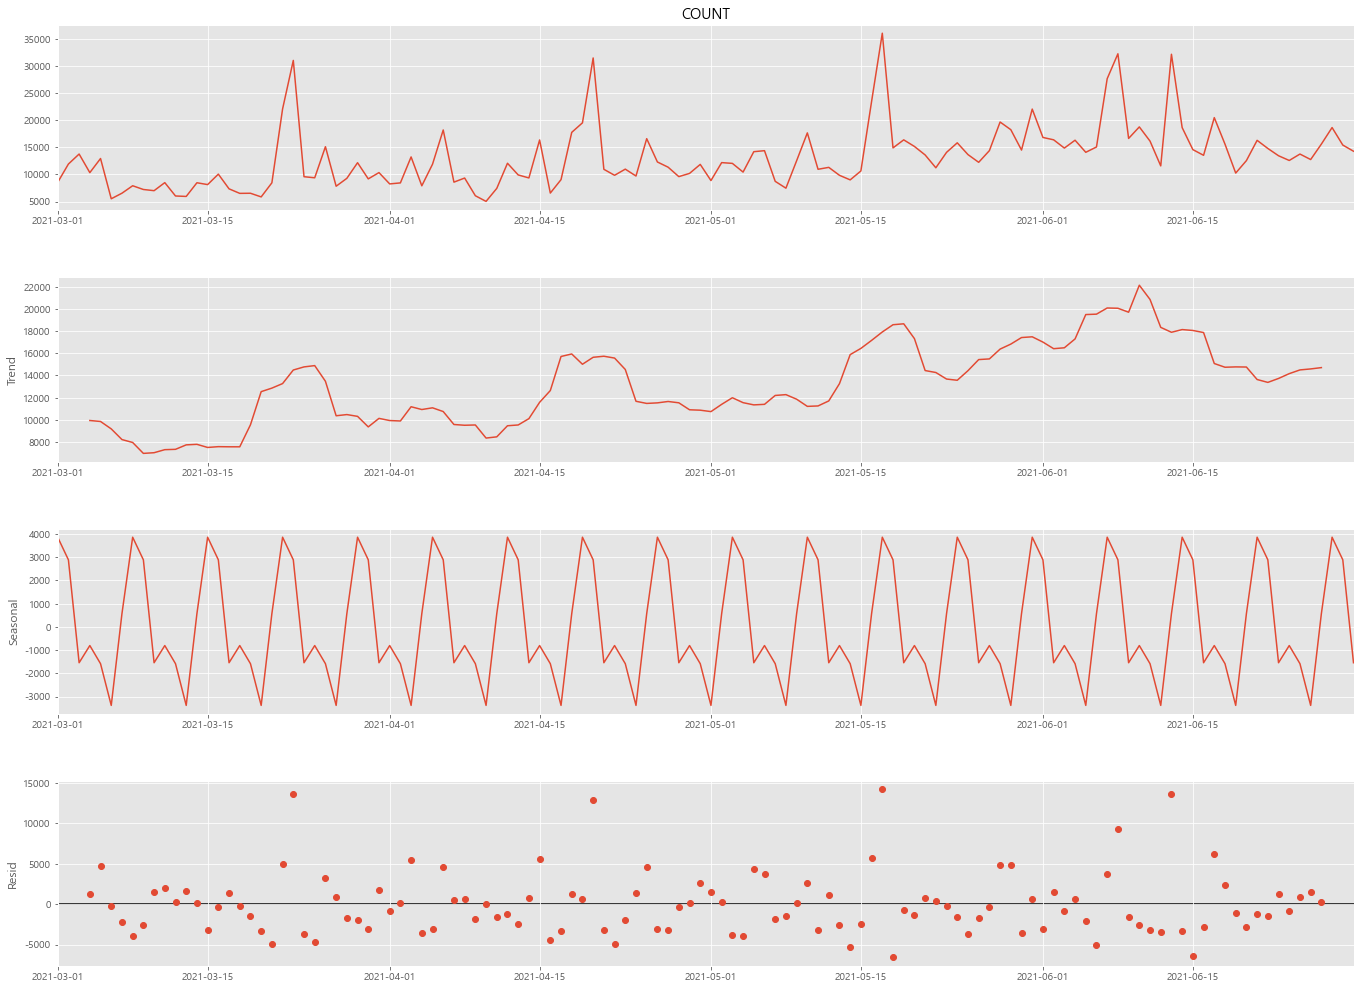

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['COUNT'],model = 'addtive',freq=7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

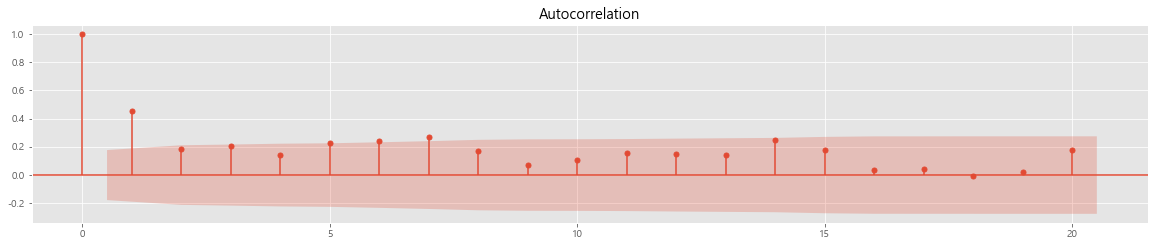

In [60]:
# 패턴이 있어서 정상성이 의심 -> 이를 판단하기 위해 ACF 그래프

import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=20,ax=ax1)


### 정상성 확인

In [61]:
# ADF 검정으로 정상성을 확인
# HO : 자료에 단위근이 존재한다. 즉 정상성을 만족하지 않는다.
# H1 : 자료가 정상성을 만족한다.

from  statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print('ADF Statistic %f' % result[0])
print('p-vlaue %f'% result[1])
print('Critical Values')
for key,value in result[4].items():
    print('\t%s : %.3f'% (key,value))
    
# p-value < 0.05 정상성 만족함(95%에서) 따라서 차분할 필요 없음 

ADF Statistic -6.670568
p-vlaue 0.000000
Critical Values
	1% : -3.486
	5% : -2.886
	10% : -2.580


### ACF/PACF

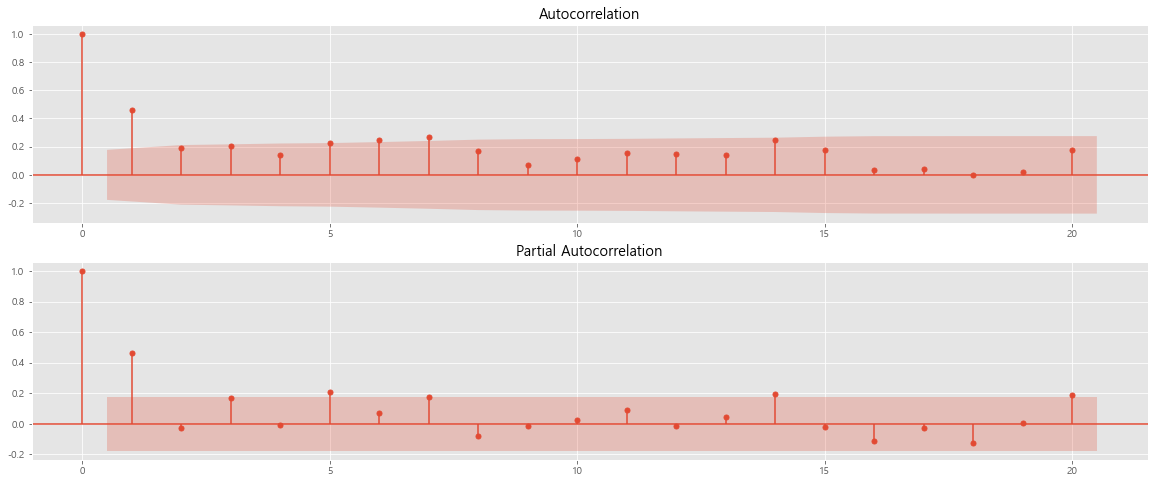

In [62]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=20,ax=ax2)

### ARIMA

<ipython-input-63-c3924f2e0525>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\zzang\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warni

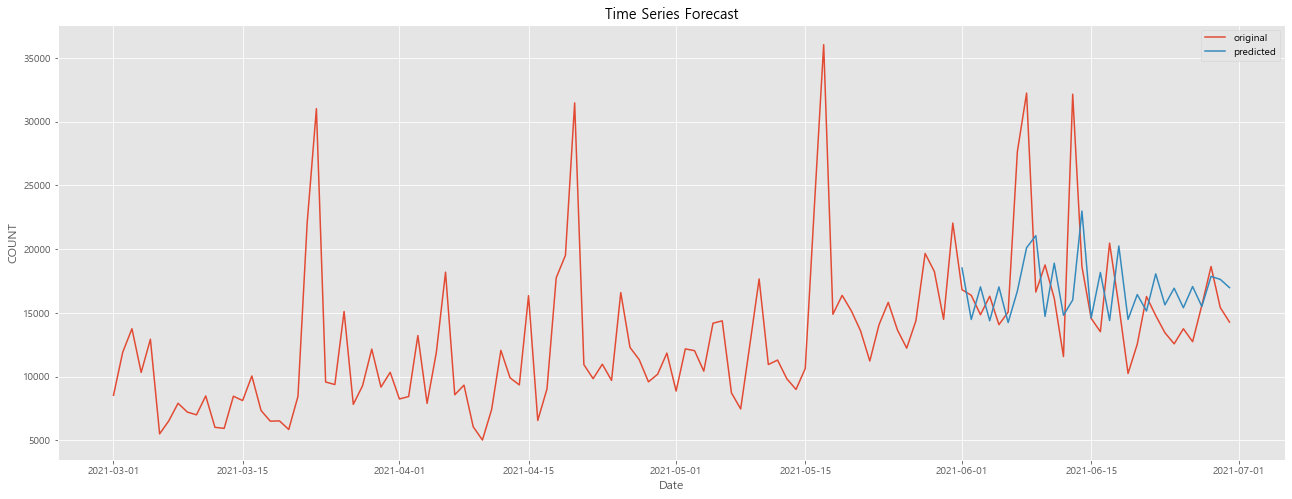

In [63]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

#fit model
model=ARIMA(df,order=(2,1,2))
model_fit=model.fit(disp=0)

#predict
start_index=datetime(2021,6,1)
end_index=datetime(2021,6,30)
forecast=model_fit.predict(start=start_index, end=end_index, typ='levels')

#visualization
plt.figure(figsize=(22,8))
plt.plot(FC_gon['BKG_DATE'],FC_gon['COUNT'], label="original")
plt.plot(forecast,label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("COUNT")
plt.legend()
plt.show()

### 잔차분석

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

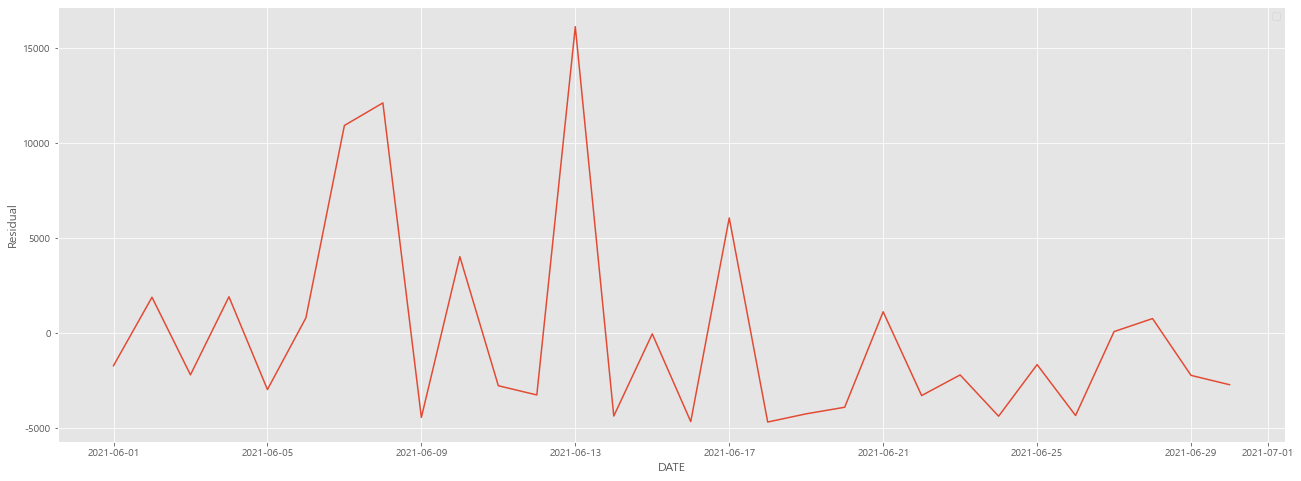

In [64]:
import numpy as np

resi = np.array(FC_gon[FC_gon.BKG_DATE>=start_index].COUNT) - np.array(forecast)

plt.figure(figsize=(22,8))
plt.plot(FC_gon.BKG_DATE[FC_gon.BKG_DATE>=start_index],resi)
plt.xlabel("DATE")
plt.ylabel("Residual")
plt.legend()
plt.show

### 정상성 판단

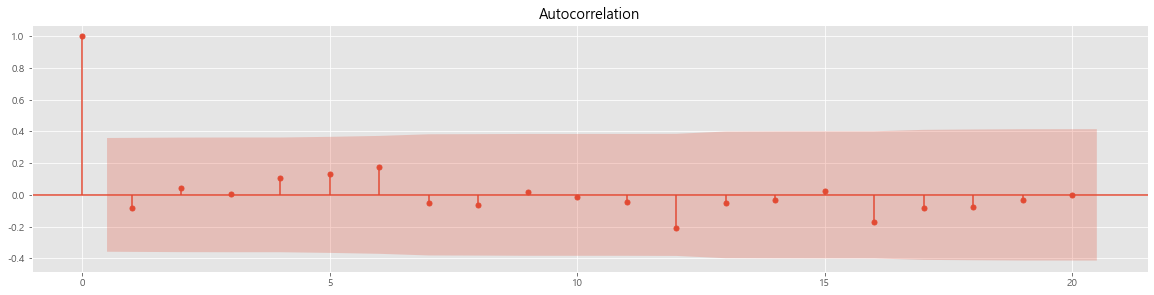

In [65]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

In [66]:
result = adfuller(resi)
print('ADF Statistic %f' % result[0])
print('p-vlaue %f'% result[1])
print('Critical Values')
for key,value in result[4].items():
    print('\t%s : %.3f'% (key,value))

ADF Statistic -5.640672
p-vlaue 0.000001
Critical Values
	1% : -3.679
	5% : -2.968
	10% : -2.623


### 성능평가

In [67]:
from sklearn import metrics
import numpy as np

def scoring(y_true,y_pred):
    r2 = round(metrics.r2_score(y_true,y_pred) * 100,3)
    corr = round(np.corrcoef(y_true,y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_percentage_error(y_true,y_pred)*100,3)
    rmse = round(metrics.mean_squared_error(y_true,y_pred,squared=False),3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape
    },
                    index=[0])
    return df

In [69]:
scoring(np.array(FC_gon[FC_gon.BKG_DATE>=start_index].COUNT),np.array(forecast))

,R2,Corr,RMSE,MAPE
0,-0.334,0.207,5187.464,21.634
